In [52]:
%matplotlib inline

In [53]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model by declaring a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Display the first row's columns and data in dictionary format for Measurement
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fed0f107f40>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [13]:
# Display the first row's columns and data in dictionary format for Station
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fed0f138580>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = (
    session #take the session we've opened
    .query(Measurement) #Look in the Measurement dataset
    .order_by(Measurement
              .date #Order by date
              .desc()) #In decending order
    .first() #Pull the first row
    .date) #Take the value in the "date" column

recent_date

'2017-08-23'

Text(0, 0.5, 'Precipitation based on date')

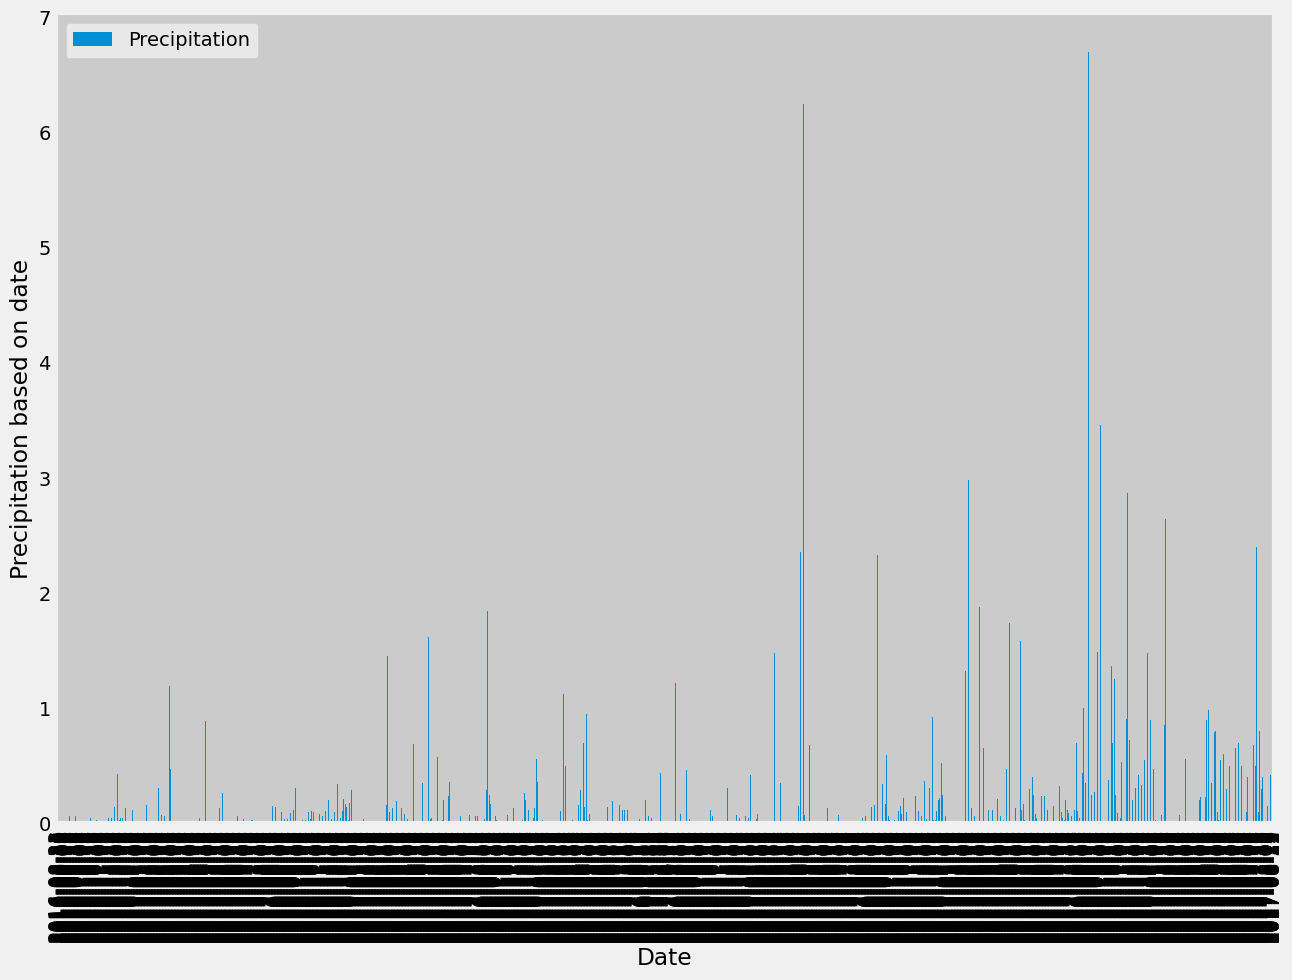

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
last_date = ((
    dt #Using datetime module
    .datetime #retrieve datetime object

# Starting from the most recent data point in the database. 
    .strptime(recent_date, '%Y-%m-%d') #grab the recent date as a string in '%Y-%m-%d'format

# Calculate the last date one year from the most recent date in data set.
    - #subtract
    dt
    .timedelta(days=365)) #365 days from it
    .strftime('%Y-%m-%d')) #put the result in '%Y-%m-%d' format

last_date

# Perform a query to retrieve the data and precipitation scores
last_year_data = (
    session
    .query(Measurement.date, Measurement.prcp) #query the measurement date and precipitation columns
    .filter(Measurement.date >= last_date) #only keep dates that are greater than or equal to last_date
    .all()) #grab everything that matches the filter

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_data = pd.DataFrame(last_year_data, columns=["Date","Precipitation"]).set_index('Date').dropna()

# Sort the dataframe by date
last_year_data.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
bar1 = last_year_data.plot.bar(rot=90, figsize=(14,10))
bar1.set_ylabel('Precipitation based on date')


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()